# ✅ 阶段三：真实可行三角形结构展示

In [1]:

import numpy as np
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from algorithms.market import Market
from algorithms.passive_ps_max import passive_ps_max
from utils.market_generator import MarketGenerator
from utils.visualization import plot_surplus_triangle
from utils.visualization import plot_surplus_triangle_from_vertices
from utils.triangle_utils import compute_surplus_triangle, triangle_features
import matplotlib.pyplot as plt


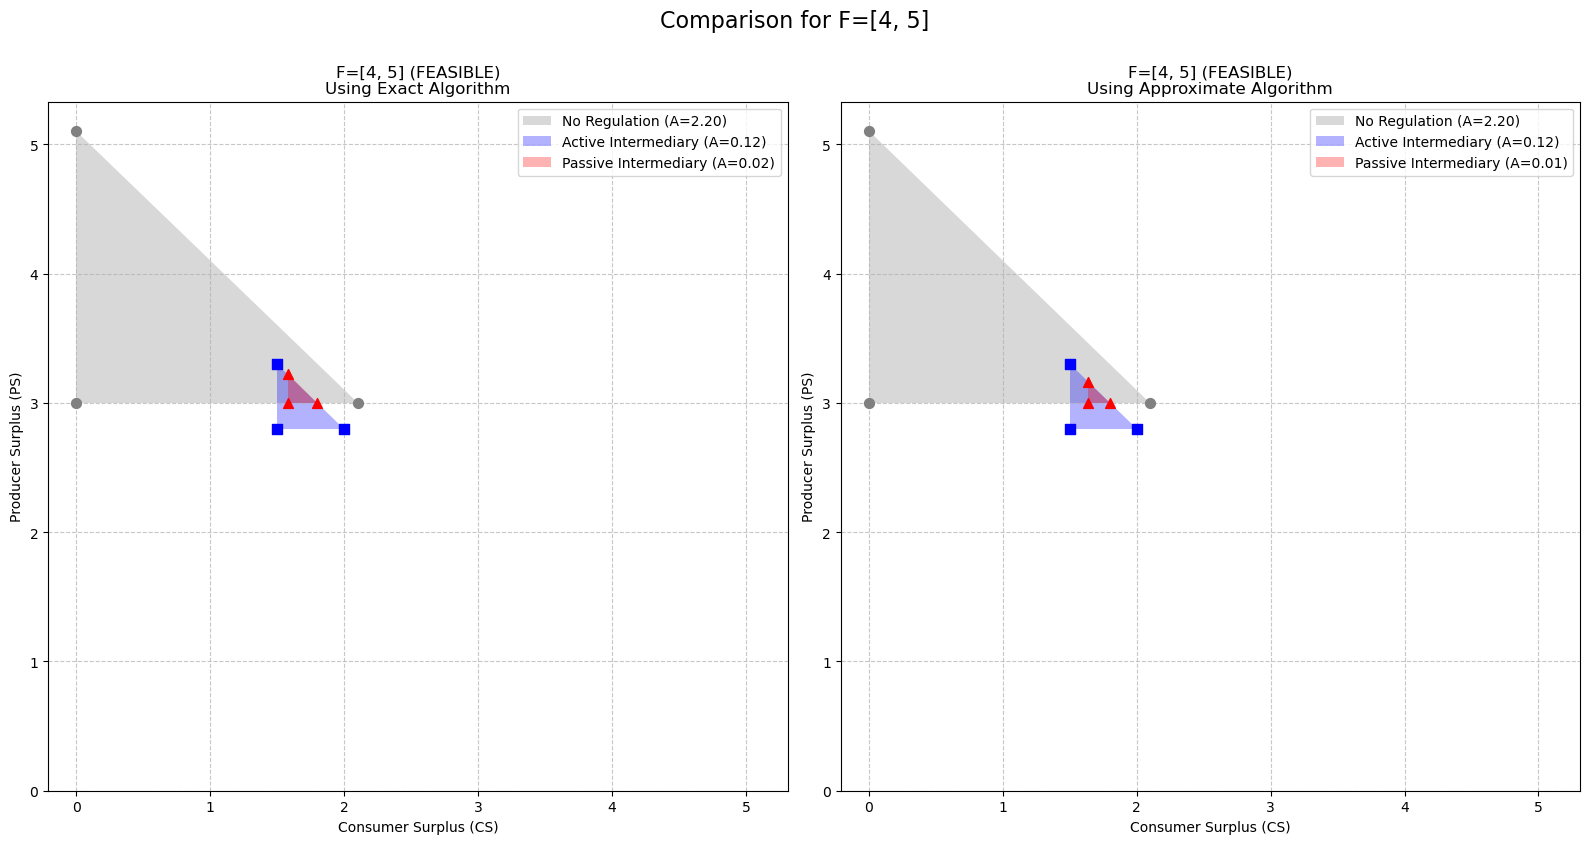


========== 比较 F=[4, 5] 的结果 ==========
F可行性: 可行

被动中介三角形面积比较:
精确算法面积: 0.024200
近似算法面积: 0.012800
差异百分比: 47.11%

顶点坐标比较:
  顶点:
    精确: CS=1.5800, PS=3.2200
    近似: CS=1.6400, PS=3.1600
    差异: CS差=0.0600, PS差=0.0600
  左底点:
    精确: CS=1.5800, PS=3.0000
    近似: CS=1.6400, PS=3.0000
    差异: CS差=0.0600, PS差=0.0000
  右底点:
    精确: CS=1.8000, PS=3.0000
    近似: CS=1.8000, PS=3.0000
    差异: CS差=0.0000, PS差=0.0000




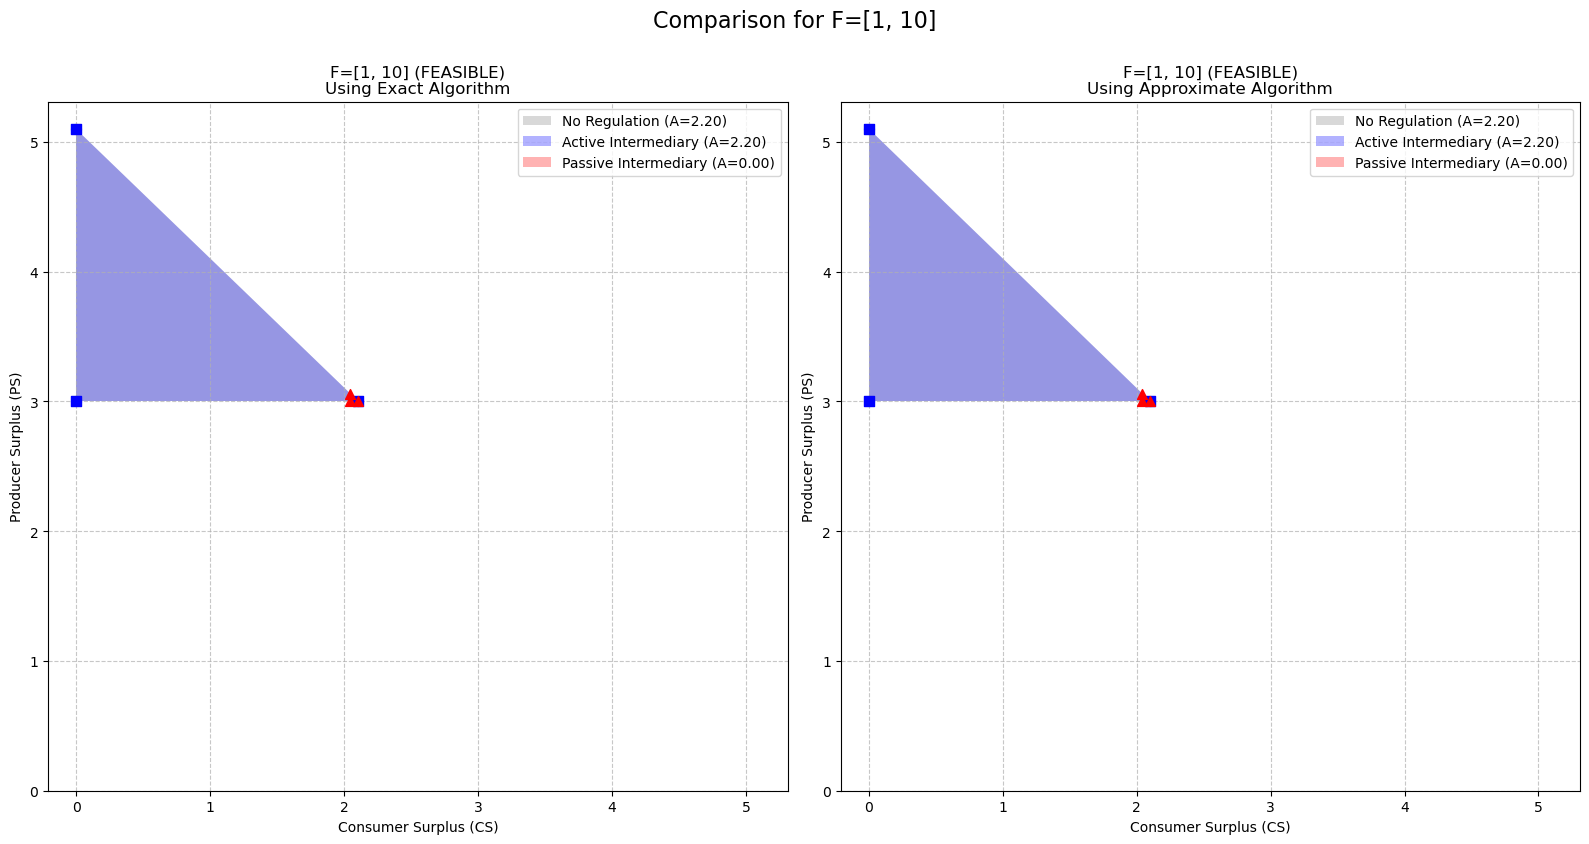


========== 比较 F=[1, 10] 的结果 ==========
F可行性: 可行

被动中介三角形面积比较:
精确算法面积: 0.001800
近似算法面积: 0.001800
差异百分比: 0.00%

顶点坐标比较:
  顶点:
    精确: CS=2.0400, PS=3.0600
    近似: CS=2.0400, PS=3.0600
    差异: CS差=0.0000, PS差=0.0000
  左底点:
    精确: CS=2.0400, PS=3.0000
    近似: CS=2.0400, PS=3.0000
    差异: CS差=0.0000, PS差=0.0000
  右底点:
    精确: CS=2.1000, PS=3.0000
    近似: CS=2.1000, PS=3.0000
    差异: CS差=0.0000, PS差=0.0000




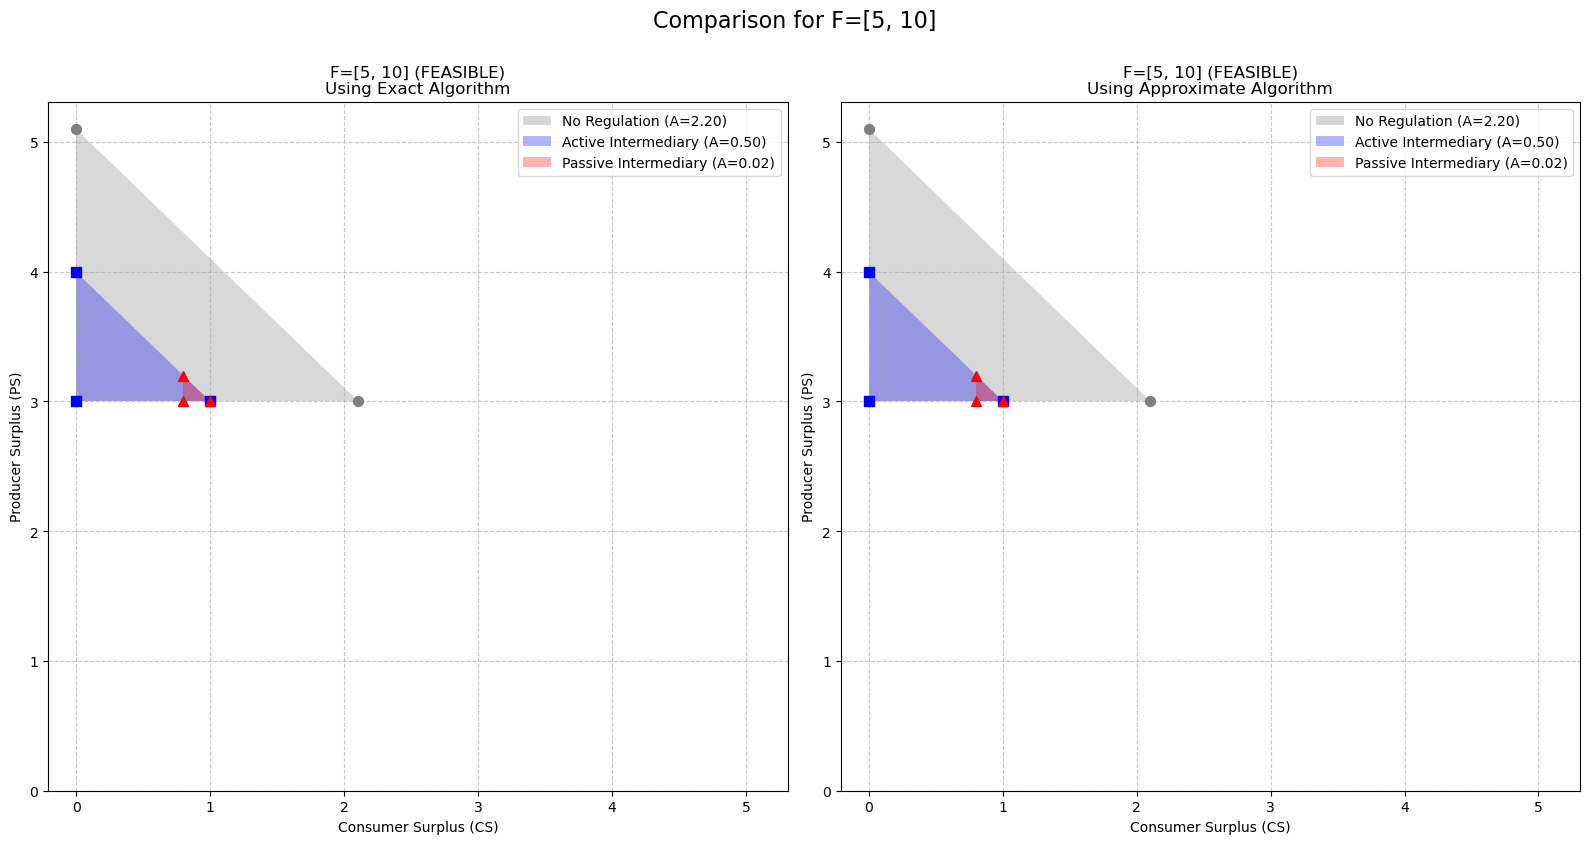


========== 比较 F=[5, 10] 的结果 ==========
F可行性: 可行

被动中介三角形面积比较:
精确算法面积: 0.020000
近似算法面积: 0.020000
差异百分比: 0.00%

顶点坐标比较:
  顶点:
    精确: CS=0.8000, PS=3.2000
    近似: CS=0.8000, PS=3.2000
    差异: CS差=0.0000, PS差=0.0000
  左底点:
    精确: CS=0.8000, PS=3.0000
    近似: CS=0.8000, PS=3.0000
    差异: CS差=0.0000, PS差=0.0000
  右底点:
    精确: CS=1.0000, PS=3.0000
    近似: CS=1.0000, PS=3.0000
    差异: CS差=0.0000, PS差=0.0000




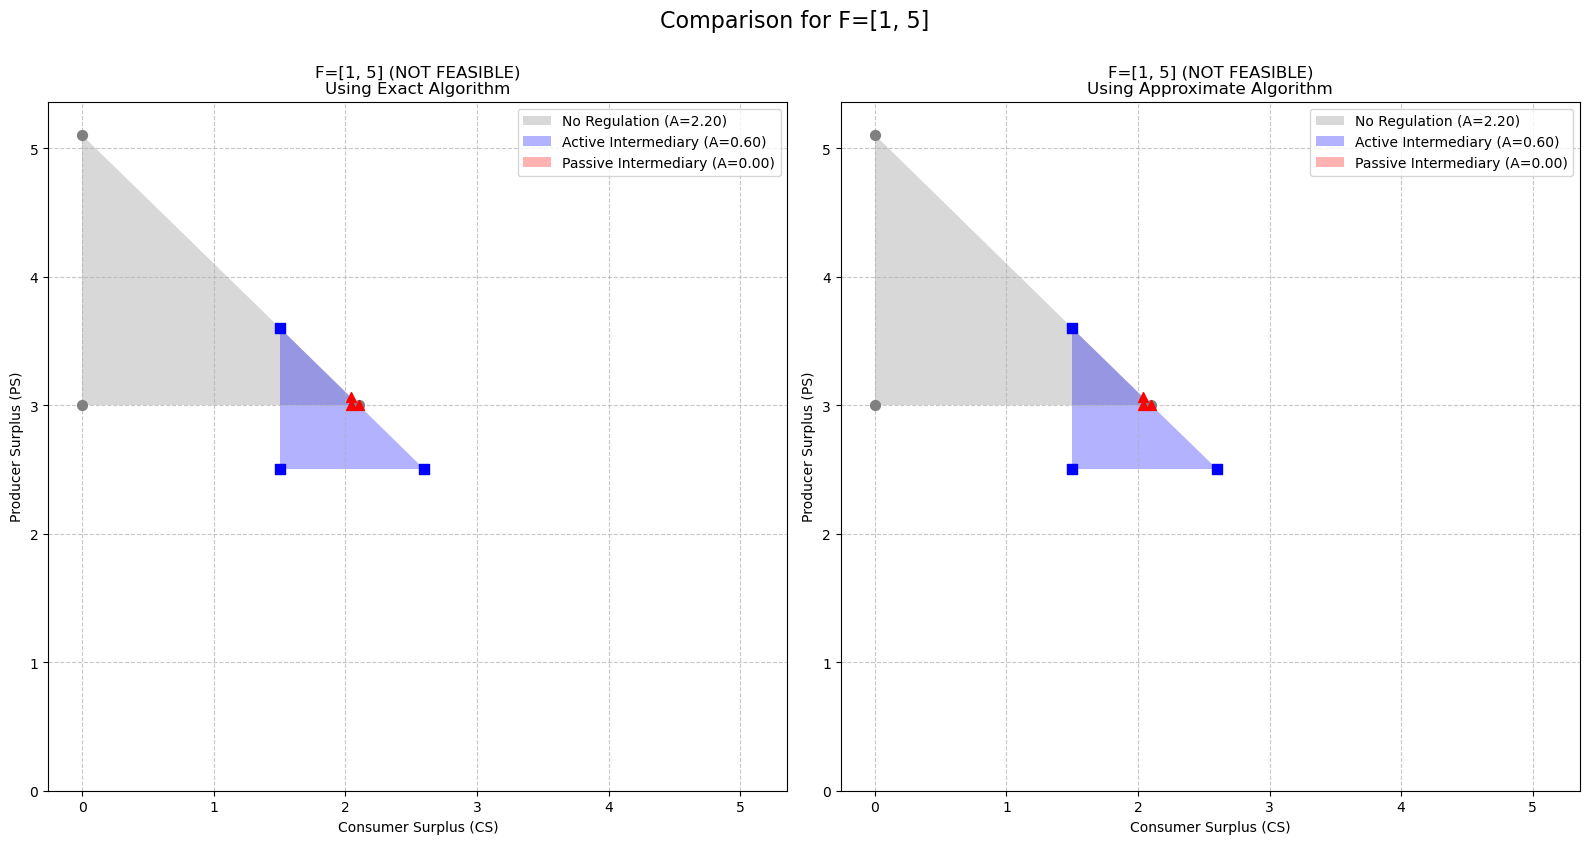


========== 比较 F=[1, 5] 的结果 ==========
F可行性: 不可行

被动中介三角形面积比较:
精确算法面积: 0.001800
近似算法面积: 0.001800
差异百分比: 0.00%

顶点坐标比较:
  顶点:
    精确: CS=2.0400, PS=3.0600
    近似: CS=2.0400, PS=3.0600
    差异: CS差=0.0000, PS差=0.0000
  左底点:
    精确: CS=2.0400, PS=3.0000
    近似: CS=2.0400, PS=3.0000
    差异: CS差=0.0000, PS差=0.0000
  右底点:
    精确: CS=2.1000, PS=3.0000
    近似: CS=2.1000, PS=3.0000
    差异: CS差=0.0000, PS差=0.0000




In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 确保utils目录在路径中
sys.path.append(str(Path.cwd()))
from utils.triangle_visualizer import TriangleVisualizer

# 创建示例数据
values_V = np.array([1, 4, 5, 10])  # 与论文Example 1.2相同的价值集合
x_star = np.array([0.3, 0.2, 0.2, 0.3])  # 与论文Example 1.2相同的市场分布

# 初始化可视化器
visualizer = TriangleVisualizer(x_star, values_V)

# 测试不同的F值
F_values = [
    [4, 5],    # 原始F值
    [1, 10],   # 最大范围
    [5, 10],   # 高价区间
    [1, 5]     # 低价区间
]

# 为每种F值创建精确vs近似的对比图
for i, F in enumerate(F_values):
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    
    # 检查F是否可行
    is_feasible = visualizer.check_F_feasibility(F)
    feasibility_text = "FEASIBLE" if is_feasible else "NOT FEASIBLE"
    
    # 左图：使用精确算法(如果可行)
    visualizer.draw_triangles(F, ax=axs[0], fixed_axes=True, use_exact_algorithm=True)
    axs[0].set_title(f'F={F} ({feasibility_text})\nUsing Exact Algorithm')
    
    # 右图：使用近似算法
    visualizer.draw_triangles(F, ax=axs[1], fixed_axes=True, use_exact_algorithm=False)
    axs[1].set_title(f'F={F} ({feasibility_text})\nUsing Approximate Algorithm')
    
    plt.tight_layout()
    plt.suptitle(f'Comparison for F={F}', fontsize=16, y=1.05)
    plt.show()
    
    # 分析并比较两种方法的三角形特征
    exact_features = visualizer.analyze_triangle_features(F, use_exact_algorithm=True)
    approx_features = visualizer.analyze_triangle_features(F, use_exact_algorithm=False)
    
    # 打印比较结果
    print(f"\n========== 比较 F={F} 的结果 ==========")
    print(f"F可行性: {'可行' if is_feasible else '不可行'}")
    
    print("\n被动中介三角形面积比较:")
    exact_area = exact_features['passive_intermediary']['area']
    approx_area = approx_features['passive_intermediary']['area']
    diff_pct = ((exact_area - approx_area) / exact_area * 100) if exact_area != 0 else float('inf')
    
    print(f"精确算法面积: {exact_area:.6f}")
    print(f"近似算法面积: {approx_area:.6f}")
    print(f"差异百分比: {diff_pct:.2f}%")
    
    # 比较顶点位置差异
    print("\n顶点坐标比较:")
    vertex_names = ["顶点", "左底点", "右底点"]
    for j, name in enumerate(vertex_names):
        exact_vertex = exact_features['passive_intermediary']['vertices'][j]
        approx_vertex = approx_features['passive_intermediary']['vertices'][j]
        
        print(f"  {name}:")
        print(f"    精确: CS={exact_vertex[0]:.4f}, PS={exact_vertex[1]:.4f}")
        print(f"    近似: CS={approx_vertex[0]:.4f}, PS={approx_vertex[1]:.4f}")
        
        # 计算CS和PS的差异
        cs_diff = abs(exact_vertex[0] - approx_vertex[0])
        ps_diff = abs(exact_vertex[1] - approx_vertex[1])
        
        print(f"    差异: CS差={cs_diff:.4f}, PS差={ps_diff:.4f}")
    
    print("\n================================================================\n")

C:\Users\Tzn\Downloads\毕业论文\代码\price_discrimination\utils\triangle_visualizer.py:119: UserWarning: PassivePSMax算法无法为给定的F生成有效方案，使用近似计算
  warnings.warn("PassivePSMax算法无法为给定的F生成有效方案，使用近似计算")


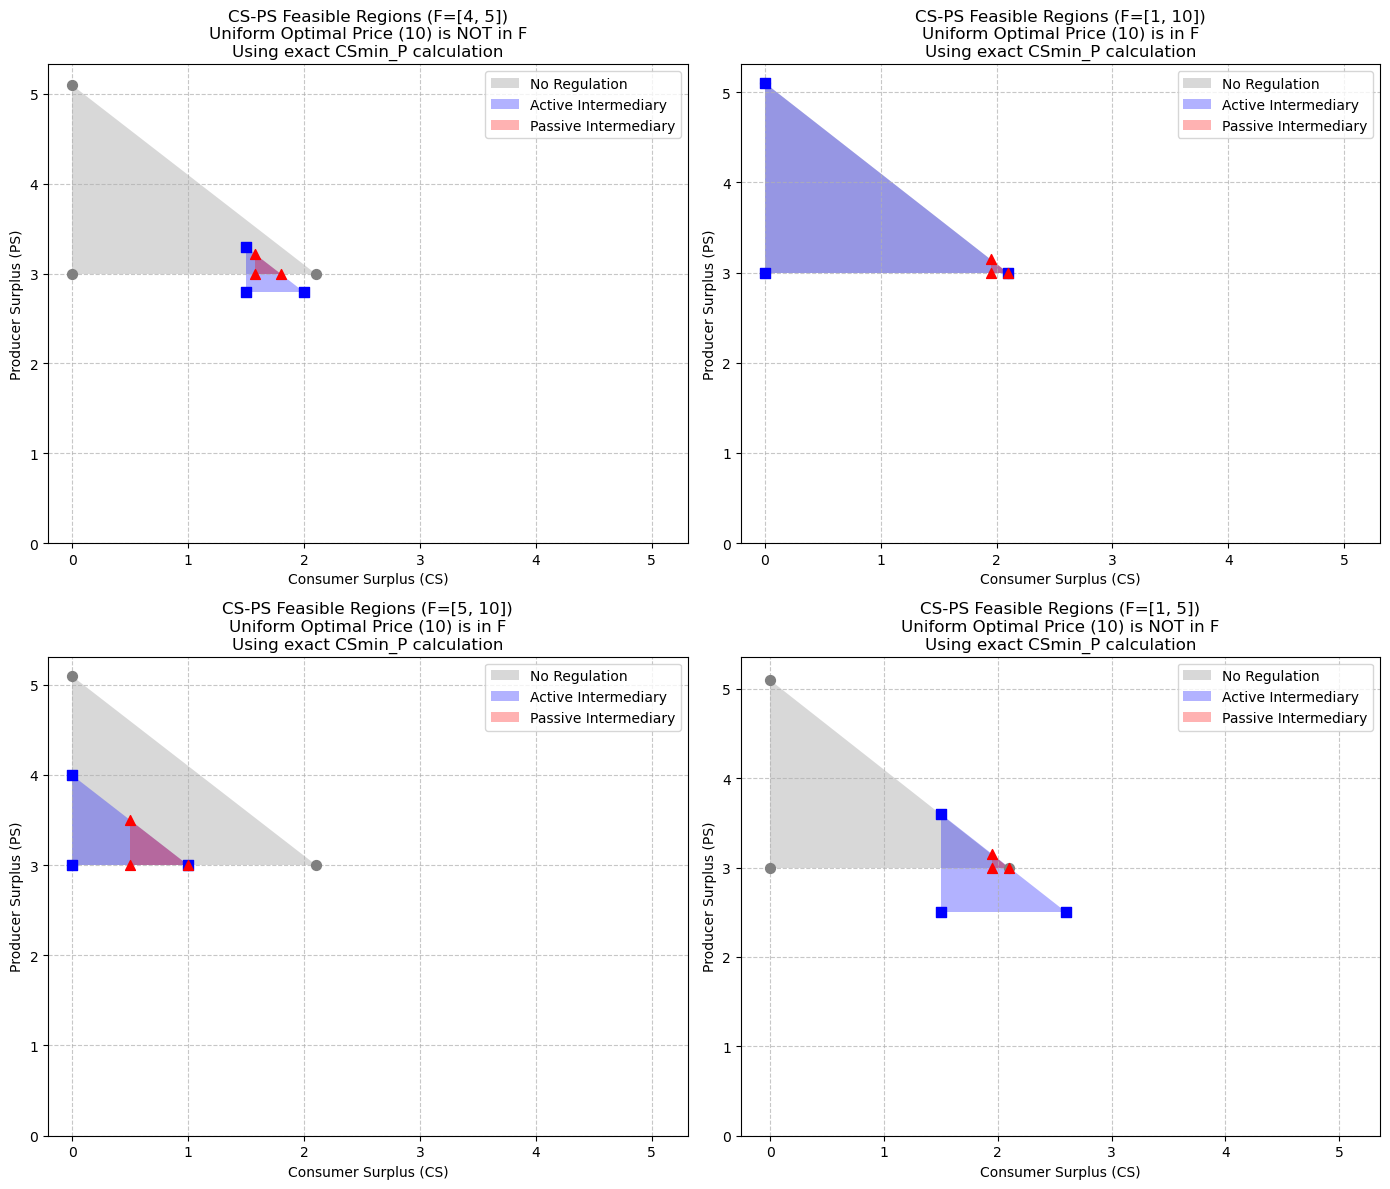

三角形顶点坐标:

NO_REGULATION:
  顶点坐标:
    左顶点: CS=0.0000, PS=5.1000
    左底点: CS=0.0000, PS=3.0000
    右底点: CS=2.1000, PS=3.0000
  特征:
    area: 2.2050
    height: 2.1000
    width: 2.1000
    max_cs: 2.1000
    max_ps: 5.1000

PASSIVE_INTERMEDIARY:
  顶点坐标:
    顶点: CS=1.5800, PS=3.2200
    左底点: CS=1.5800, PS=3.0000
    右底点: CS=1.8000, PS=3.0000
  特征:
    area: 0.0242
    height: 0.2200
    width: 0.2200
    min_cs: 1.5800
    max_cs: 1.8000
    max_ps: 3.2200


ValueError: Unknown format code 'f' for object of type 'str'

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 确保utils目录在路径中
sys.path.append(str(Path.cwd()))
from utils.triangle_visualizer import TriangleVisualizer

# 创建示例数据
values_V = np.array([1, 4, 5, 10])  # 与论文Example 1.2相同的价值集合
x_star = np.array([0.3, 0.2, 0.2, 0.3])  # 与论文Example 1.2相同的市场分布

# 初始化可视化器
visualizer = TriangleVisualizer(x_star, values_V)

# 测试不同的F值
F_values = [
    [4, 5],  # 原始F值
    [1, 10],  # 最大范围
    [5, 10],  # 高价区间
    [1, 5]   # 低价区间
]

# 创建2x2网格来比较不同的F值
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
axs = axs.flatten()

for i, F in enumerate(F_values):
    visualizer.draw_triangles(F, ax=axs[i], fixed_axes=True)
    
plt.tight_layout()
plt.show()

# 分析一个特定F值的三角形特征
features = visualizer.analyze_triangle_features(F_values[0])
print("三角形顶点坐标:")
for scenario, data in features.items():
    print(f"\n{scenario.upper()}:")
    print("  顶点坐标:")
    for i, vertex in enumerate(data['vertices']):
        vertex_type = ""
        if i == 0 and scenario != "no_regulation":
            vertex_type = "顶点"
        elif i == 0 and scenario == "no_regulation":
            vertex_type = "左顶点"
        elif i == 1:
            vertex_type = "左底点"
        elif i == 2:
            vertex_type = "右底点"
        print(f"    {vertex_type}: CS={vertex[0]:.4f}, PS={vertex[1]:.4f}")
    
    # 打印其他特征
    print("  特征:")
    for key, value in data.items():
        if key != 'vertices':
            print(f"    {key}: {value:.4f}")

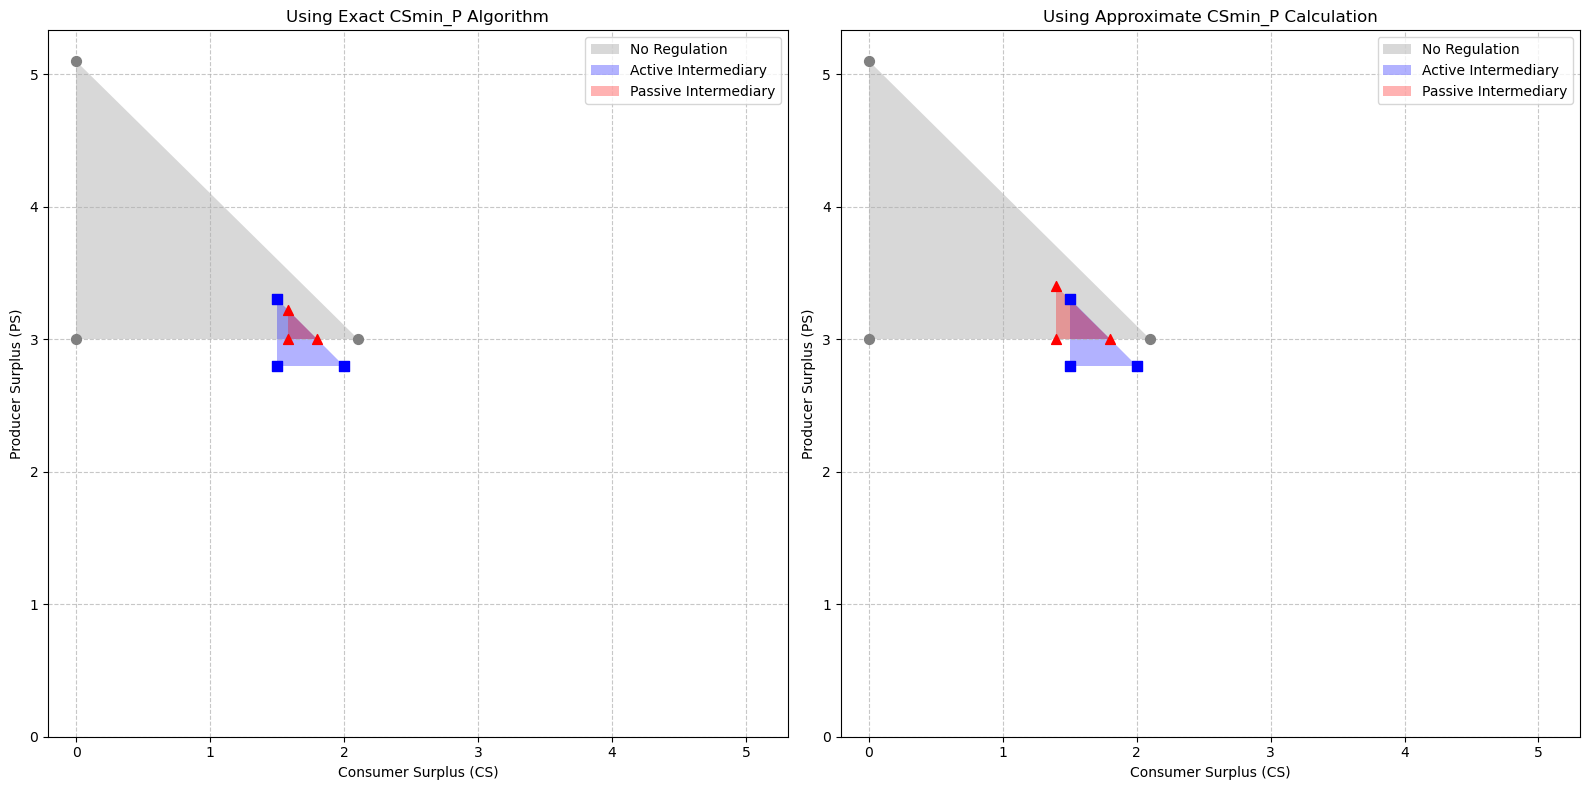

精确算法vs近似算法比较:

被动中介三角形特征比较:
精确算法面积: 0.024200
近似算法面积: 0.080000
差异百分比: -230.58%

精确算法被动中介三角形顶点:
  顶点: CS=1.5800, PS=3.2200
  左底点: CS=1.5800, PS=3.0000
  右底点: CS=1.8000, PS=3.0000

近似算法被动中介三角形顶点:
  顶点: CS=1.4000, PS=3.4000
  左底点: CS=1.4000, PS=3.0000
  右底点: CS=1.8000, PS=3.0000


In [3]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
from utils.triangle_visualizer import TriangleVisualizer

# 创建示例数据
values_V = np.array([1, 4, 5, 10])
x_star = np.array([0.3, 0.2, 0.2, 0.3])
F = [4, 5]

# 初始化可视化器
visualizer = TriangleVisualizer(x_star, values_V)

# 创建一个图来比较精确算法和近似算法
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# 左图：使用精确算法
visualizer.draw_triangles(F, ax=axs[0], fixed_axes=True, use_exact_algorithm=True)
axs[0].set_title('Using Exact CSmin_P Algorithm')

# 右图：使用近似算法
visualizer.draw_triangles(F, ax=axs[1], fixed_axes=True, use_exact_algorithm=False)
axs[1].set_title('Using Approximate CSmin_P Calculation')

plt.tight_layout()
plt.show()

# 分析并比较两种方法的三角形特征
exact_features = visualizer.analyze_triangle_features(F, use_exact_algorithm=True)
approx_features = visualizer.analyze_triangle_features(F, use_exact_algorithm=False)

print("精确算法vs近似算法比较:")
print("\n被动中介三角形特征比较:")
print(f"精确算法面积: {exact_features['passive_intermediary']['area']:.6f}")
print(f"近似算法面积: {approx_features['passive_intermediary']['area']:.6f}")
print(f"差异百分比: {((exact_features['passive_intermediary']['area'] - approx_features['passive_intermediary']['area']) / exact_features['passive_intermediary']['area'] * 100):.2f}%")

# 输出顶点坐标
print("\n精确算法被动中介三角形顶点:")
for i, vertex in enumerate(exact_features['passive_intermediary']['vertices']):
    vertex_type = "顶点" if i == 0 else "左底点" if i == 1 else "右底点"
    print(f"  {vertex_type}: CS={vertex[0]:.4f}, PS={vertex[1]:.4f}")

print("\n近似算法被动中介三角形顶点:")
for i, vertex in enumerate(approx_features['passive_intermediary']['vertices']):
    vertex_type = "顶点" if i == 0 else "左底点" if i == 1 else "右底点"
    print(f"  {vertex_type}: CS={vertex[0]:.4f}, PS={vertex[1]:.4f}")

三角形顶点：
A = (0, 5.1)  (最大社会福利)
B = (0, 3.0)  (统一价格收入)
C = (2.0999999999999996, 3.0)  (CS = 福利 - 收入)


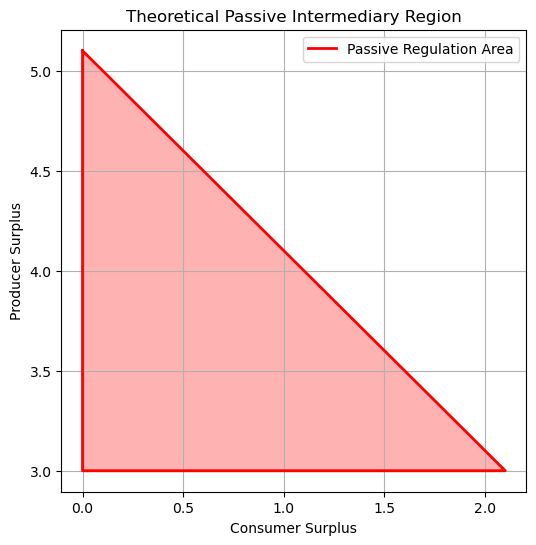

In [2]:
from utils.visualization import plot_passive_surplus_triangle_theory

values = [1, 4, 5, 10]
masses = [0.3, 0.2, 0.2, 0.3]
market = Market(values, masses)
F = [1, 4, 5, 10]

scheme = passive_ps_max(market, F)
plot_passive_surplus_triangle_theory(market, F, show_scheme=True, scheme=scheme)


In [3]:
# 我们将以真实计算方式还原论文中 Passive 三角形顶点的坐标
# 并输出顶点坐标以检查为何当前图像是一条线

import numpy as np

# 构造 market
values = np.array([1, 4, 5, 10])
masses = np.array([0.3, 0.2, 0.2, 0.3])
v_dot_m = values * masses

# 顶点 A = SW_max = sum(v_i * m_i for v_i >= min(F))
F = [1, 4, 5, 10]
min_f = min(F)
SW_max = sum(v * m for v, m in zip(values, masses) if v >= min_f)

# 顶点 B = R_uniform
uniform_price = 5  # 可替换为最优统一定价
R_uniform = uniform_price * sum(m for v, m in zip(values, masses) if v >= uniform_price)

# 顶点 C: CS_uniform = SW_max - R_uniform
CS_uniform = SW_max - R_uniform

# 三个顶点
A = (0, SW_max)
B = (0, R_uniform)
C = (CS_uniform, R_uniform)

A, B, C

((0, 5.1), (0, 2.5), (2.5999999999999996, 2.5))

## 示例 1：Geometric 分布
- 分布参数: q = 0.5
- 价格集: F = [2, 4]


Executing PassivePSMax algorithm:
Market: Market(values=[ 1  2  4  8 16], masses=[0.51612903 0.25806452 0.12903226 0.06451613 0.03225806])
Price set F: [2, 4]

Iteration 1:
Remaining market: Market(values=[ 1  2  4  8 16], masses=[0.51612903 0.25806452 0.12903226 0.06451613 0.03225806])
Selected optimal F price: 2
Support set: [1, 2, 8, 16]
Calculated gamma: 0.5806451612903226
Added segment with price 2
Remaining mass: 0.4193548387096774

Iteration 2:
Remaining market: Market(values=[ 1  2  4  8 16], masses=[0.25806452 0.         0.12903226 0.03225806 0.        ])
Selected optimal F price: 4
Support set: [1, 4, 8]
Calculated gamma: 0.2903225806451613
Added segment with price 4
Remaining mass: 0.12903225806451613

Iteration 3:
Remaining market: Market(values=[ 1  2  4  8 16], masses=[0.06451613 0.         0.06451613 0.         0.        ])
Selected optimal F price: 4
Support set: [1, 4]
Calculated gamma: 0.08602150537634408
Added segment with price 4
Remaining mass: 0.04301075268817204

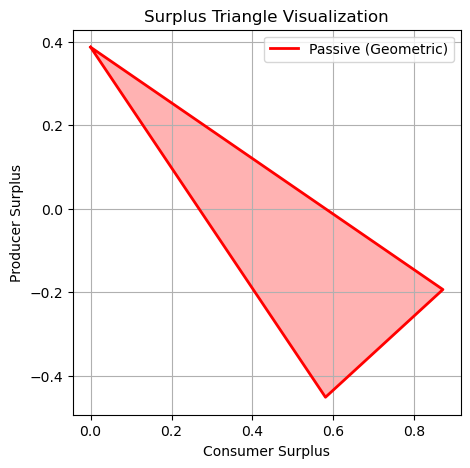

顶点坐标: [(0.0, 0.3870967741935485), (0.5806451612903225, -0.4516129032258063), (0.8709677419354838, -0.1935483870967742)]
面积: 0.19667013527575433
几何特征: {'edge_lengths': [1.0200895677962514, 0.3884385347997513, 1.0467729509411583], 'is_isoceles': False, 'area': 0.19667013527575433}


In [2]:

values, masses = MarketGenerator.geometric(q=0.5, n=5)
market = Market(values, masses)
F = [2, 4]

scheme = passive_ps_max(market, F, debug=True)
if scheme:
    vertices, area = compute_surplus_triangle(market, F, scheme)
    plt.figure(figsize=(5,5))
    plot_surplus_triangle_from_vertices(vertices, label="Passive (Geometric)", color="red")
    print("顶点坐标:", vertices)
    print("面积:", area)
    print("几何特征:", triangle_features(vertices))
else:
    print("⚠️ F 不可行，无法构建三角形")


## 示例 2：Binary 分布
- 分布参数: p = 0.5
- 价格集: F = [1, 10]

In [3]:

values, masses = MarketGenerator.binary(p=0.5, low=1, high=10)
market = Market(values, masses)
F = [1, 10]

scheme = passive_ps_max(market, F, debug=True)
if scheme:
    vertices, area = compute_surplus_triangle(market, F, scheme)
    plt.figure(figsize=(5,5))
    plot_surplus_triangle_from_vertices(vertices, label="Passive (Binary)", color="red")
    print("顶点坐标:", vertices)
    print("面积:", area)
    print("几何特征:", triangle_features(vertices))
else:
    print("⚠️ F 不可行，无法构建三角形")



Executing PassivePSMax algorithm:
Market: Market(values=[ 1 10], masses=[0.5 0.5])
Price set F: [1, 10]

Iteration 1:
Remaining market: Market(values=[ 1 10], masses=[0.5 0.5])
Selected optimal F price: 10
Support set: [10]
No valid gamma found, stopping
⚠️ F 不可行，无法构建三角形


## 示例 3：截断正态分布
- σ = 1.0
- F = [3.5, 5.5, 7.5]

In [4]:

values, masses = MarketGenerator.truncated_normal(mu=5, sigma=1.0, n=5)
market = Market(values, masses)
F = [3.5, 5.5, 7.5]

scheme = passive_ps_max(market, F, debug=True)
if scheme:
    vertices, area = compute_surplus_triangle(market, F, scheme)
    plt.figure(figsize=(5,5))
    plot_surplus_triangle_from_vertices(vertices, label="Passive (Normal)", color="red")
    print("顶点坐标:", vertices)
    print("面积:", area)
    print("几何特征:", triangle_features(vertices))
else:
    print("⚠️ F 不可行，无法构建三角形")



Executing PassivePSMax algorithm:
Market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[2.99014165e-04 1.92767667e-01 7.86612434e-01 2.03175627e-02
 3.32174732e-06])
Price set F: [3.5, 5.5, 7.5]

Iteration 1:
Remaining market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[2.99014165e-04 1.92767667e-01 7.86612434e-01 2.03175627e-02
 3.32174732e-06])
Selected optimal F price: 5.5
Support set: [1.0, 3.25, 5.5, 7.75, 10.0]
Calculated gamma: 3.75035987977056e-05
Added segment with price 5.5
Remaining mass: 0.9999624964012024

Iteration 2:
Remaining market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[2.76017453e-04 1.92763486e-01 7.86606395e-01 2.03165983e-02
 0.00000000e+00])
Selected optimal F price: 5.5
Support set: [1.0, 3.25, 5.5, 7.75]
Calculated gamma: 0.0004501359890222615
Added segment with price 5.5
Remaining mass: 0.9995123604121802

Iteration 3:
Remaining market: Market(values=[ 1.    3.25  5.5   7.75 10.  ], masses=[0.         0.1927133  0.78653391 

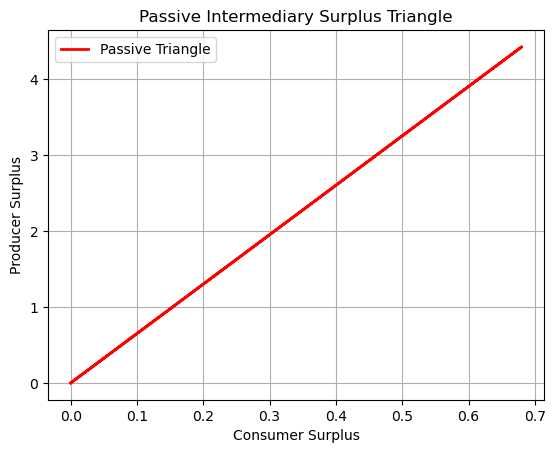

面积: 0.0
顶点: [(0.0, 0.0), (0.68, 4.42), (0.68, 4.42)]


In [2]:
from utils.triangle_utils import construct_passive_surplus_triangle
from utils.visualization import plot_theoretical_passive_triangle

values = [1, 4, 5, 10]
masses = [0.3, 0.2, 0.2, 0.3]
market = Market(values, masses)
F = [1, 4, 5, 10]

vertices, area = construct_passive_surplus_triangle(market, F)
if vertices:
    plot_theoretical_passive_triangle(vertices, label="Passive Triangle")
    print("面积:", area)
    print("顶点:", vertices)
else:
    print("该 F 下没有可行的三角形")
